So I have demonstrated how to classify images of the CIFAR10 dataset.



I HAVE shown 2 MULTI LAYER PERCEPTRON models AND  2 CONVOLUTIONAL NEURAL NETWORKS models.


In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
# importing the necessary libraries and importing data using keras.datasrts.cifar10
(train_x,train_y),(test_x,test_y) =tf.keras.datasets.cifar10.load_data()
print(' train_x_shape',train_x.shape,'\n','train_y_shape',train_y.shape,'\n','test_x_shape',test_x.shape,'\n','test_y_shape',test_y.shape)
train_x=train_x.astype(float)/255
test_x=test_x.astype(float)/255
train_y=tf.keras.utils.to_categorical(train_y)
test_y=tf.keras.utils.to_categorical(test_y)


 train_x_shape (50000, 32, 32, 3) 
 train_y_shape (50000, 1) 
 test_x_shape (10000, 32, 32, 3) 
 test_y_shape (10000, 1)


CNN(CONVOLUTIONAL NEURAL NETWORK MODELS)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.optimizers import SGD


def cnn_model_1():
  model=Sequential()
  model.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
  model.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
  model.add(MaxPooling2D((2,2)))
  model.add(Conv2D(64,(3,3),activation='relu'))
  model.add(Conv2D(64,(3,3),activation='relu'))
  model.add(MaxPooling2D((2,2)))
  model.add(Flatten())
  model.add(Dense(128,activation='relu'))
  model.add(Dense(10,activation='softmax'))
  optimized_by=SGD(lr=0.001,momentum=0.9)
  model.compile(optimizer=optimized_by,loss='categorical_crossentropy',metrics=['accuracy'])
  return model
def cnn_model_2():
  model=Sequential()
  model.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
  model.add(MaxPooling2D((2,2)))
  model.add(Conv2D(64,(3,3),activation='relu'))
  model.add(MaxPooling2D((2,2)))
  model.add(Conv2D(64,(3,3),activation='relu'))
  model.add(MaxPooling2D((2,2)))
  model.add(Flatten())
  model.add(Dense(64,activation='relu'))
  model.add(Dense(10,activation='softmax'))
  opt=SGD(lr=0.005,momentum=0.9)
  model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
  return model

# See different models accuracy by changing the model name in the line below.
# I have shown the accuracy for cnn_model_1() .Just change the cnn_model_1 to cnn_model_2 only in the line below.
model= cnn_model_1()

history=model.fit(train_x,train_y,epochs=10,batch_size=64)
print(history.history)
print('\n')
test_metrics=model.evaluate(test_x,test_y)
print('test loss and accuracy respectively')
print(test_metrics)
# 
# CHECK PREDICTIONS FOR THIS MODEL IN THE END

Epoch 1/10
782/782 [==============================] - 4s 5ms/step - loss: 2.1183 - accuracy: 0.2292
Epoch 2/10
782/782 [==============================] - 4s 5ms/step - loss: 1.7318 - accuracy: 0.3754
Epoch 3/10
782/782 [==============================] - 4s 5ms/step - loss: 1.5915 - accuracy: 0.4264
Epoch 4/10
782/782 [==============================] - 4s 5ms/step - loss: 1.4923 - accuracy: 0.4629
Epoch 5/10
782/782 [==============================] - 4s 5ms/step - loss: 1.3962 - accuracy: 0.5010
Epoch 6/10
782/782 [==============================] - 4s 5ms/step - loss: 1.3121 - accuracy: 0.5348
Epoch 7/10
782/782 [==============================] - 4s 5ms/step - loss: 1.2463 - accuracy: 0.5604
Epoch 8/10
782/782 [==============================] - 4s 5ms/step - loss: 1.1838 - accuracy: 0.5815
Epoch 9/10
782/782 [==============================] - 4s 5ms/step - loss: 1.1277 - accuracy: 0.6041
Epoch 10/10
782/782 [==============================] - 4s 5ms/step - loss: 1.0802 - accuracy: 0.6218

CHECK PREDICTIONS ON DIFFERENT IMAGES FROM TEST SET

(0 airplane),(1 automobile),(2 bird),(3 cat),(4 deer),(5 dog),(6 frog),(7 horse), (8 ship),(9 truck)



tf.Tensor(4, shape=(), dtype=int64)


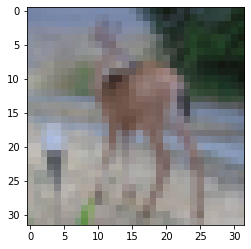

tf.Tensor(5, shape=(), dtype=int64)


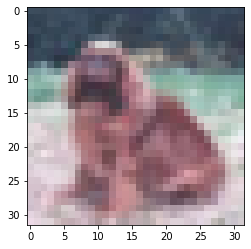

tf.Tensor(6, shape=(), dtype=int64)


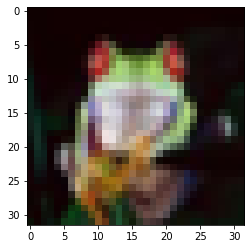

tf.Tensor(3, shape=(), dtype=int64)


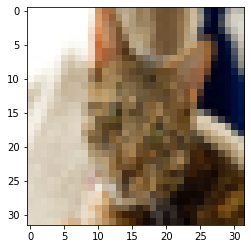

tf.Tensor(1, shape=(), dtype=int64)


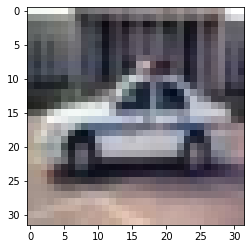

tf.Tensor(1, shape=(), dtype=int64)


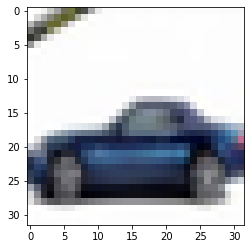

tf.Tensor(8, shape=(), dtype=int64)


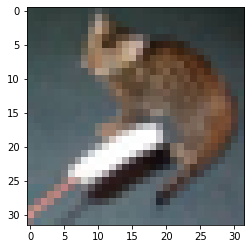

tf.Tensor(6, shape=(), dtype=int64)


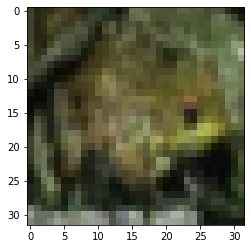

tf.Tensor(3, shape=(), dtype=int64)


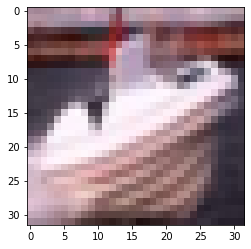

tf.Tensor(5, shape=(), dtype=int64)


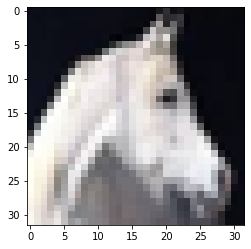

In [0]:

a=model.predict(test_x[100:110])  # SHOWN FOR A SET OF 10 IMAGES FROM INDEX 100 TO 110 FROM TEST SET
for j,i in enumerate(a):
  plt.imshow(test_x[j+100])       # PLEASE CHANGE THIS IN ACCORDANCE WITH WHICH IMAGE YOU WANT TO SEE AND WRITE 
  print(tf.math.argmax(i))        #  THE SAME INDEX IN MODEL.PREDICT(test_x[index]) in the first line of code
  plt.show()  

MLP MODELS(MULTI LAYER PERCEPTRONS)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
train_x_new=train_x.reshape(50000,32*32*3)
test_x_new=test_x.reshape(10000,32*32*3)
print(train_x_new.shape)
def mlp_model_1():
  model=Sequential()
  model.add(Dense(128,activation='tanh',input_shape=(32*32*3,)))
  model.add(Dropout(0.1))
  model.add(Dense(128,activation='tanh'))
  model.add(Dropout(0.2))
  model.add(Dense(128,activation='tanh'))
  model.add(Dense(10,activation='softmax'))
  model.summary()
  model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
  return model

def mlp_model_2():
  model=Sequential()
  model.add(Dense(1024,activation='relu',input_shape=(32*32*3,)))
  model.add(Dropout(0.2))
  model.add(Dense(1024,activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(512,activation='relu'))
  model.add(Dense(10,activation='softmax'))
  model.summary()
  model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
  return model

#See different models accuracy by changing the name of the model in the line below.
# You have to only change the below line to change it to mlp_model_1 for model1's accuracy metrics.
model= mlp_model_2() #THIS IS THE LINE WHICH YOU HAVE TO CHANGE. Just replace 2 with 1.


history=model.fit(train_x_new,train_y,epochs=50,batch_size=128)
print(history.history)
print('\n')
test_metrics=model.evaluate(test_x_new,test_y)
print('test loss and accuracy respectively')
print(test_metrics)




(50000, 3072)
Model: "sequential_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_159 (Dense)            (None, 1024)              3146752   
_________________________________________________________________
dropout_47 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_160 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dropout_48 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_161 (Dense)            (None, 512)               524800    
_________________________________________________________________
dense_162 (Dense)            (None, 10)                5130      
Total params: 4,726,282
Trainable params: 4,726,282
Non-trainable params: 0
_____________________________

PREDICTION ON IMAGES

Labels are
(0 airplane),(1 automobile),(2 bird),(3 cat),(4 deer),(5 dog),(6 frog),(7 horse), (8 ship),(9 truck)

tf.Tensor(8, shape=(), dtype=int64)


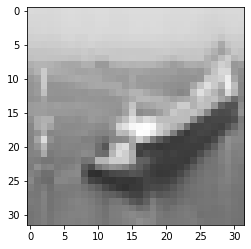

tf.Tensor(4, shape=(), dtype=int64)


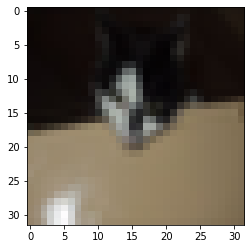

tf.Tensor(1, shape=(), dtype=int64)


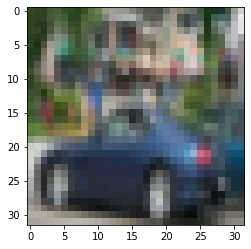

tf.Tensor(2, shape=(), dtype=int64)


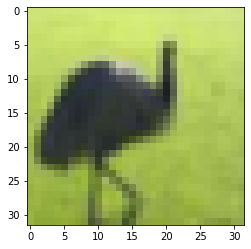

tf.Tensor(0, shape=(), dtype=int64)


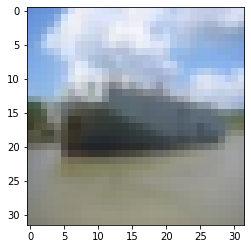

tf.Tensor(2, shape=(), dtype=int64)


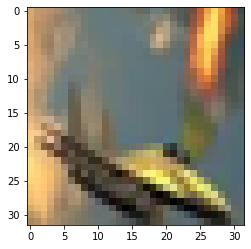

tf.Tensor(8, shape=(), dtype=int64)


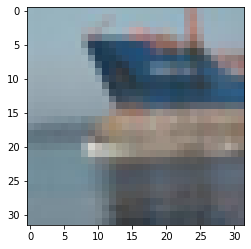

tf.Tensor(3, shape=(), dtype=int64)


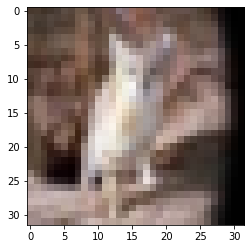

tf.Tensor(3, shape=(), dtype=int64)


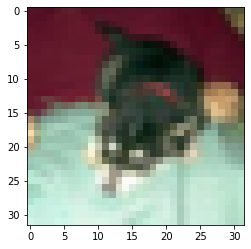

tf.Tensor(0, shape=(), dtype=int64)


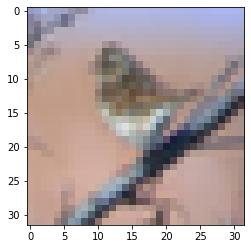

In [0]:
import matplotlib.pyplot as plt
a=model.predict(test_x_new[120:130])   #CHANGE THE INDEX HERE WITH THE INDEX OF THE IMAGES YOU WANT TO SEE
for j,i in enumerate(a):
  plt.imshow(test_x[j+120])        # CHANGE THIS IN ACCORDANCE WITH THE INDEX YOU SET ABOVE.
  print(tf.math.argmax(i))
  plt.show()  